## **Loading Dataset**

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
df = pd.read_csv('Walmart.csv')

In [367]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [369]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [370]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [371]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [372]:
df.duplicated().sum()

0

## **Exploratory Data Analysis**

### Distribution of Weekly_Sales

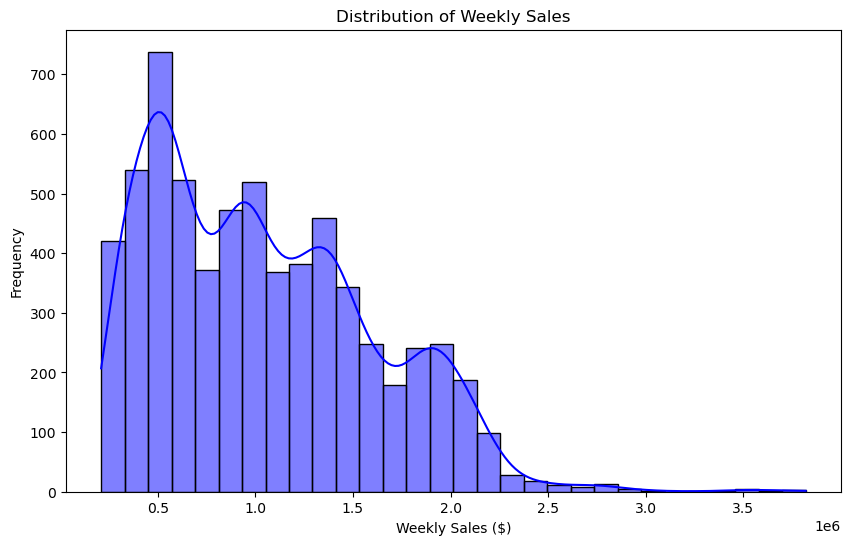

In [373]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales ($)')
plt.ylabel('Frequency')
plt.show()

### Weekly Sales by Holiday Flag

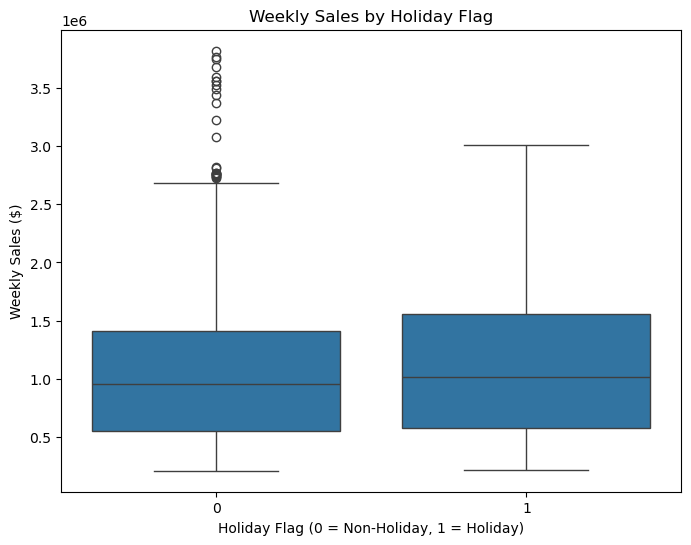

In [374]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales ($)')
plt.show()

### Weekly_Sales vs. Temperature

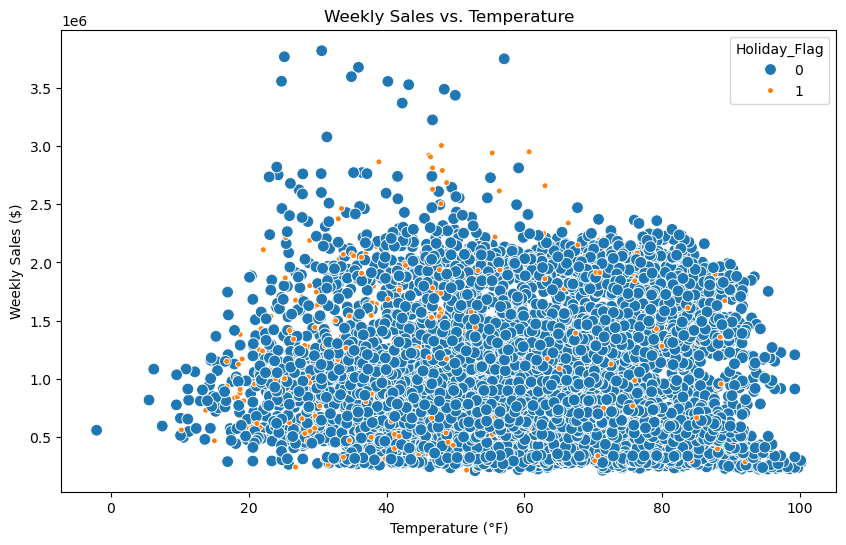

In [375]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', size='Holiday_Flag', data=df)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.show()

### Weekly_Sales vs. Fuel_Price

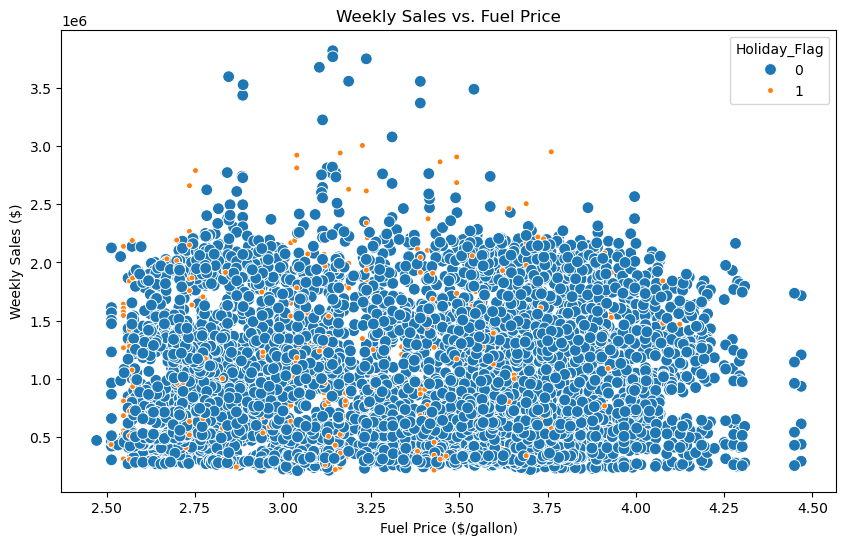

In [376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag', size='Holiday_Flag', data=df)
plt.title('Weekly Sales vs. Fuel Price')
plt.xlabel('Fuel Price ($/gallon)')
plt.ylabel('Weekly Sales ($)')
plt.show()

### Weekly_Sales vs. CPI

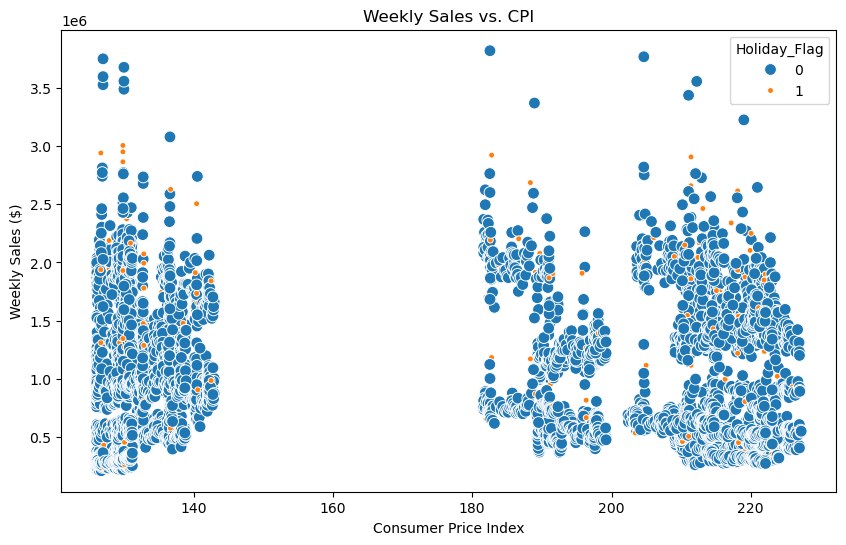

In [377]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', hue='Holiday_Flag', size='Holiday_Flag', data=df)
plt.title('Weekly Sales vs. CPI')
plt.xlabel('Consumer Price Index')
plt.ylabel('Weekly Sales ($)')
plt.show()

### Correlation Heatmap

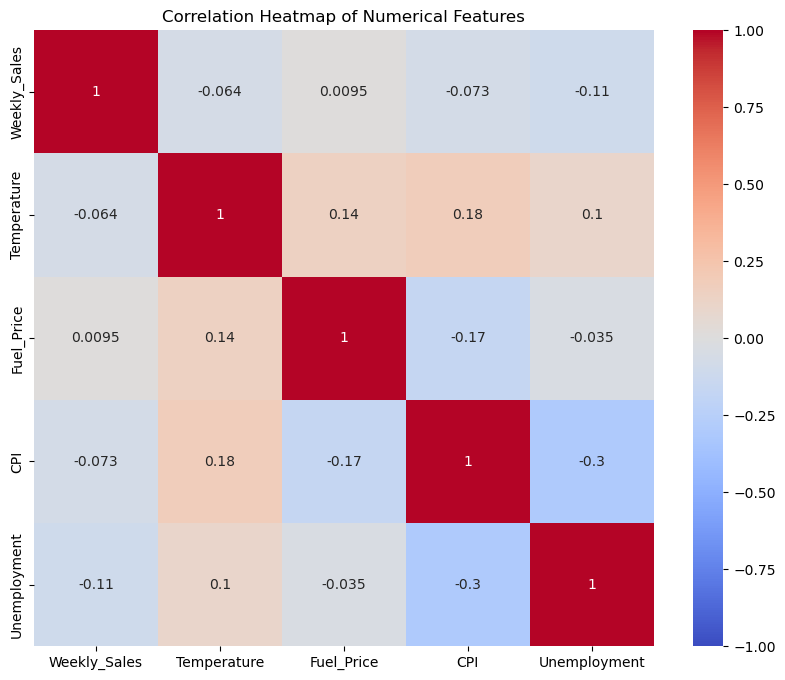

In [378]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Pairplot

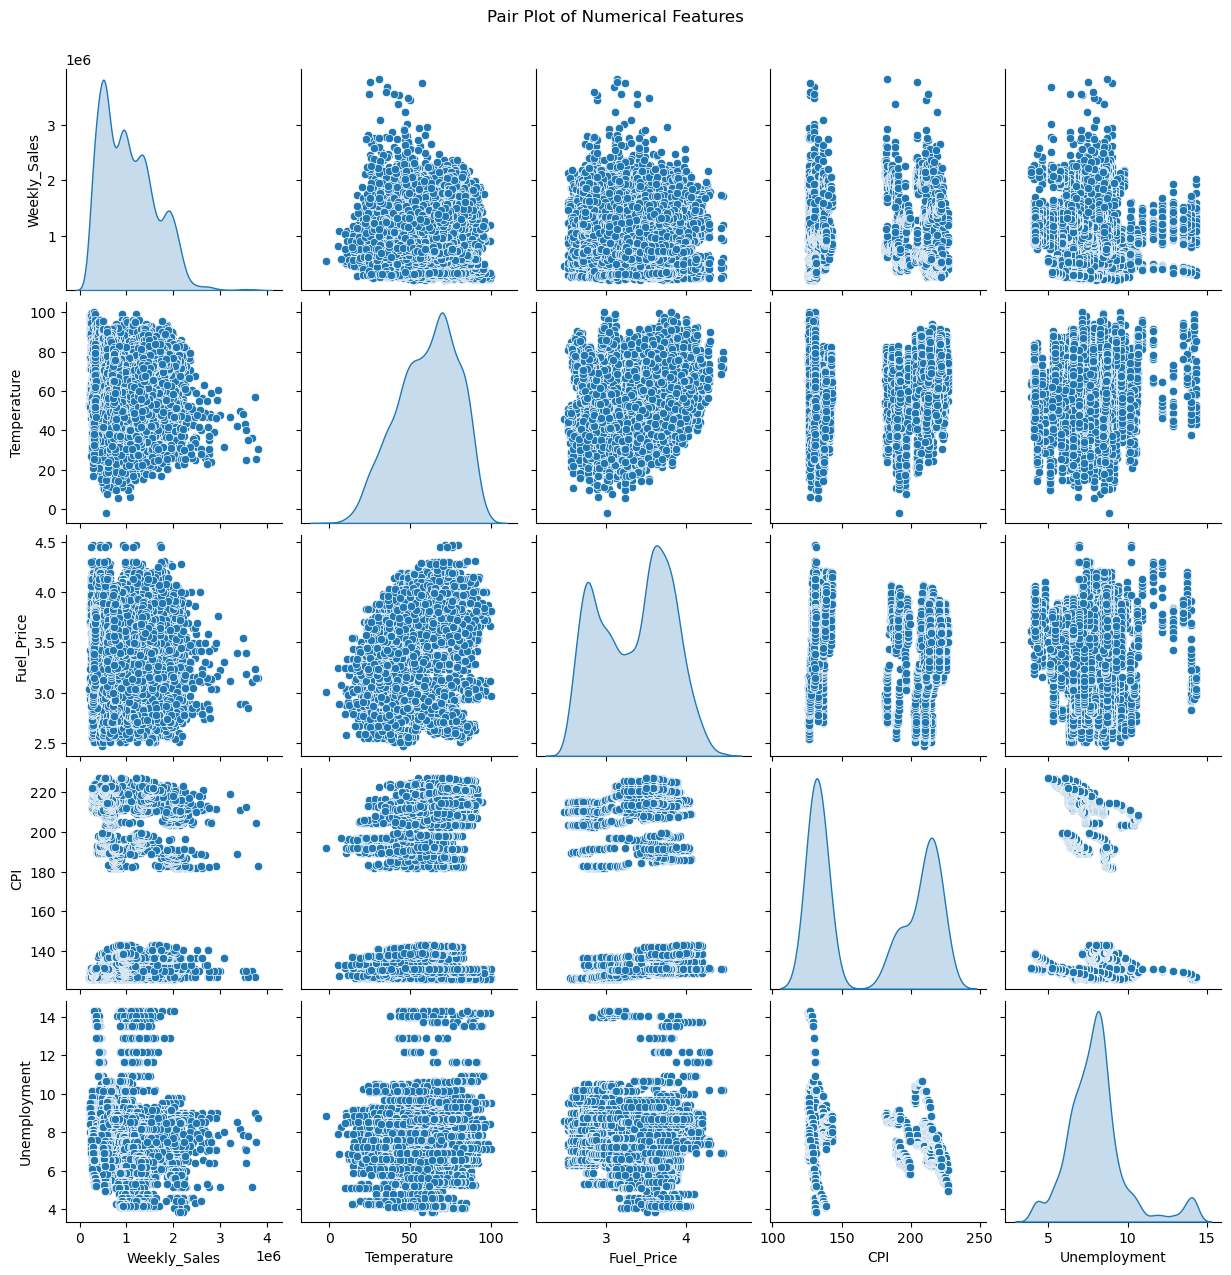

In [379]:
sns.pairplot(df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

## **Handling Outliers**

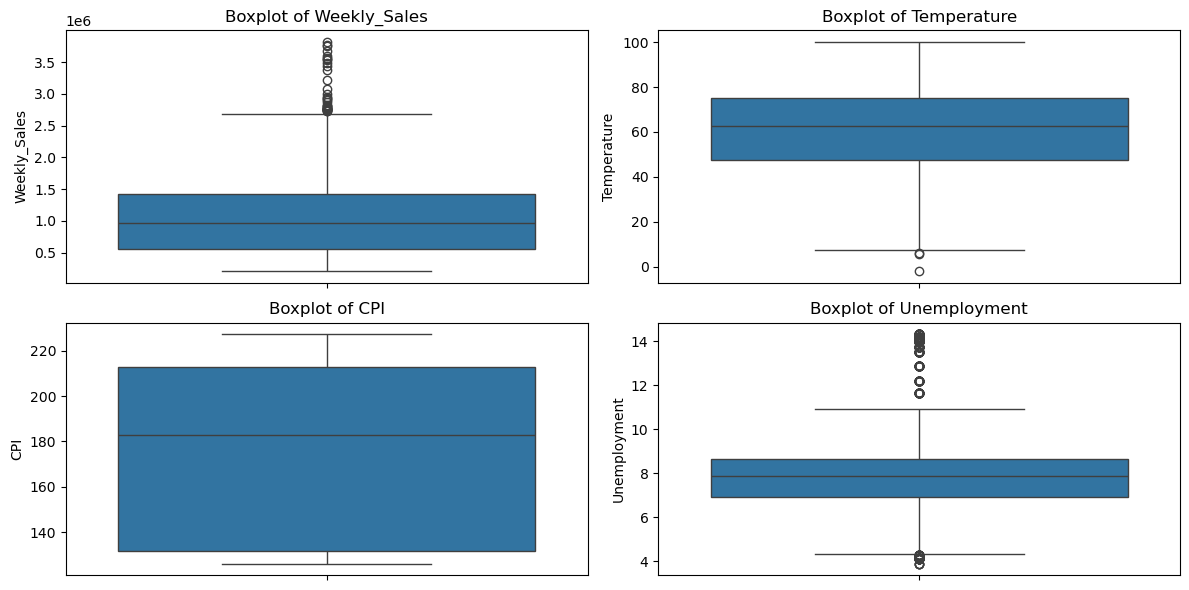

In [380]:
# Selecting numerical features to check outliers
numerical_features = ['Weekly_Sales', 'Temperature', 'CPI', 'Unemployment']

# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [381]:
# Function to cap outliers
def cap_outliers(df, columns, lower_quantile=0.01, upper_quantile=0.99):
    for col in columns:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Example usage
columns_to_cap = ['Weekly_Sales', 'CPI', 'Temperature', 'Unemployment']  # Specify relevant columns
df = cap_outliers(df, columns_to_cap)

# Check new distribution after capping
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.042888e+06,0.069930,60.680736,3.358607,171.571955,7.998754
min,1.000000,2010-02-05 00:00:00,2.531031e+05,0.000000,18.523600,2.472000,126.106903,4.156000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,2.404035e+06,1.000000,93.190000,4.468000,225.470151,14.180000
std,12.988182,NaN,5.508951e+05,0.255049,18.290814,0.459020,39.347287,1.872008


In [382]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        Feature        VIF
0         Store   4.403115
1  Holiday_Flag   1.099926
2   Temperature  13.587082
3    Fuel_Price  26.795718
4           CPI  14.833625
5  Unemployment  16.367746


In [383]:
X_new = df[['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment']]
vif_data_new = pd.DataFrame()
vif_data_new["Feature"] = X_new.columns
vif_data_new["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]
print(vif_data_new)

        Feature        VIF
0         Store   4.223420
1  Holiday_Flag   1.099677
2   Temperature  12.454446
3           CPI  11.407773
4  Unemployment  12.807179


In [384]:
df[['CPI', 'Unemployment']].corr()

,CPI,Unemployment
CPI,1.000000,-0.302213
Unemployment,-0.302213,1.000000


In [385]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Select numerical features only (excluding target variable)
X = df[['CPI', 'Unemployment', 'Temperature']]  

# Add a constant (for proper VIF calculation)
X = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

        Feature        VIF
0         const  57.097387
1           CPI   1.156885
2  Unemployment   1.131043
3   Temperature   1.061828


In [386]:
from sklearn.feature_selection import f_regression

X = df[['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

f_values, p_values = f_regression(X, y)
feature_importance = pd.DataFrame({"Feature": X.columns, "p-value": p_values})
print(feature_importance.sort_values(by="p-value"))

        Feature        p-value
0         Store  7.781101e-171
4  Unemployment   1.133379e-17
3           CPI   4.588827e-09
2   Temperature   4.654501e-06
1  Holiday_Flag   6.531766e-03


## **Model Building**

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Identify numerical features to scale
num_features = ['Temperature', 'CPI', 'Unemployment']  # Keep Store & Holiday_Flag unchanged

# Convert to NumPy array first to avoid SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features].values)
X_test_scaled[num_features] = scaler.transform(X_test[num_features].values)

In [388]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "SVR": SVR()
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            "R2 Score": r2_score(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": root_mean_squared_error(y_test, y_pred)
        }

    return pd.DataFrame(results).T

In [389]:
evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

,R2 Score,MAE,MSE,RMSE
Linear Regression,0.151220,429664.091631,2.620207e+11,511879.558242
Ridge Regression,0.151221,429663.252403,2.620206e+11,511879.449949
Lasso Regression,0.151220,429664.010690,2.620207e+11,511879.551642
Decision Tree,0.916100,90059.084510,2.590026e+10,160935.590382
Random Forest,0.948814,71838.172737,1.580133e+10,125703.328311
Gradient Boosting,0.899493,130245.492148,3.102689e+10,176144.510081
SVR,-0.027384,467464.618818,3.171563e+11,563166.336044


### Hyperparameter Tuning

In [390]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the model
rf_random.fit(X_train_scaled, y_train)

# Best parameters
print("Best Hyperparameters:", rf_random.best_params_)

# Evaluate best model
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Calculate metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
R2 Score: 0.950064757389978
MAE: 70227.270744044
MSE: 15415148133.388222
RMSE: 124157.7550271759


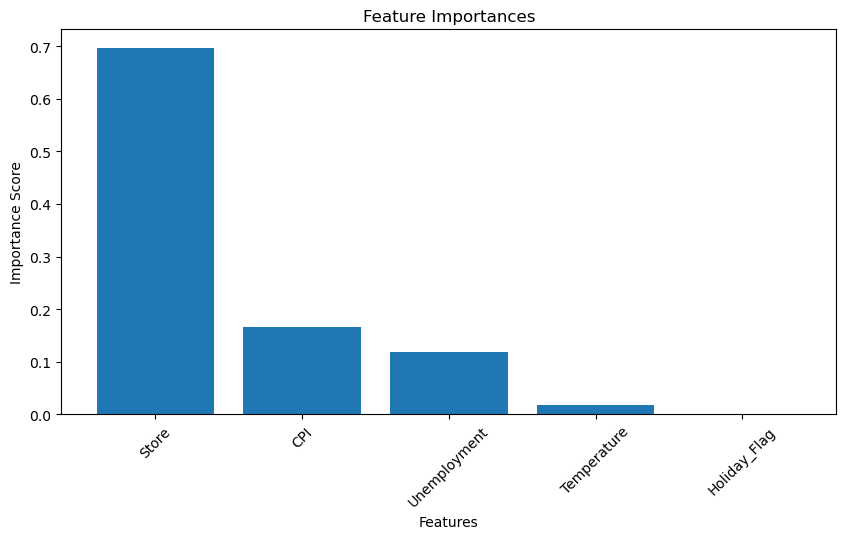

In [391]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
features = X_train.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

### Saving the Model

In [392]:
# Save the trained best model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

# Save the scaler (assuming you used one)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)